#restnet50

In [1]:
!pip install kaggle --quiet

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashrafulhossenakash/alzheimer-disease-dataset
!unzip -q /content/alzheimer-disease-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/ashrafulhossenakash/alzheimer-disease-dataset
License(s): CC0-1.0
 96% 331M/346M [00:00<00:00, 610MB/s]
100% 346M/346M [00:00<00:00, 641MB/s]


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

train_dir = '/content/Alzheimer_Dataset_V2/train'
val_dir   = '/content/Alzheimer_Dataset_V2/val'
test_dir  = '/content/Alzheimer_Dataset_V2/test'


In [3]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 23788 images belonging to 4 classes.
Found 5097 images belonging to 4 classes.
Found 5099 images belonging to 4 classes.


In [4]:
resnet18 = tf.keras.applications.ResNet50(  # Note: ResNet18 is not in keras.applications
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='max'
)



model = Sequential([
    resnet18,
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 23,797,380 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
744/744 ━━━━━━━━━━━━━━━━━━━━ 329s 350ms/step - accuracy: 0.4997 - loss: 2.1780 - val_accuracy: 0.7461 - val_loss: 0.5853
Epoch 2/5
744/744 ━━━━━━━━━━━━━━━━━━━━ 237s 318ms/step - accuracy: 0.7797 - loss: 0.5174 - val_accuracy: 0.8493 - val_loss: 0.3525
Epoch 3/5
744/744 ━━━━━━━━━━━━━━━━━━━━ 229s 308ms/step - accuracy: 0.9075 - loss: 0.2442 - val_accuracy: 0.8848 - val_loss: 0.3640
Epoch 4/5
744/744 ━━━━━━━━━━━━━━━━━━━━ 229s 308ms/step - accuracy: 0.9530 - loss: 0.1368 - val_accuracy: 0.9319 - val_loss: 0.1916
Epoch 5/5
744/744 ━━━━━━━━━━━━━━━━━━━━ 229s 308ms/step - accuracy: 0.9700 - loss: 0.0888 - val_accuracy: 0.9615 - val_loss: 0.1171


In [ ]:
model.save("resnet50.keras")
model.save_weights("resnet18.weights.h5")


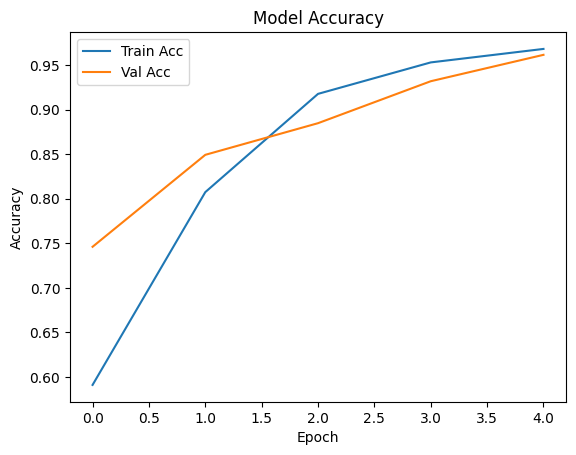

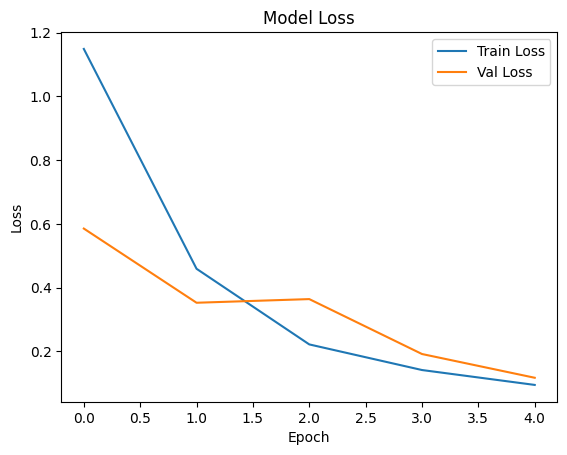

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 5099 images belonging to 4 classes.
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.97      0.96      0.97      1344
ModerateDemented       1.00      1.00      1.00       971
     NonDemented       0.96      0.93      0.95      1440
VeryMildDemented       0.92      0.96      0.94      1344

        accuracy                           0.96      5099
       macro avg       0.96      0.96      0.96      5099
    weighted avg       0.96      0.96      0.96      5099



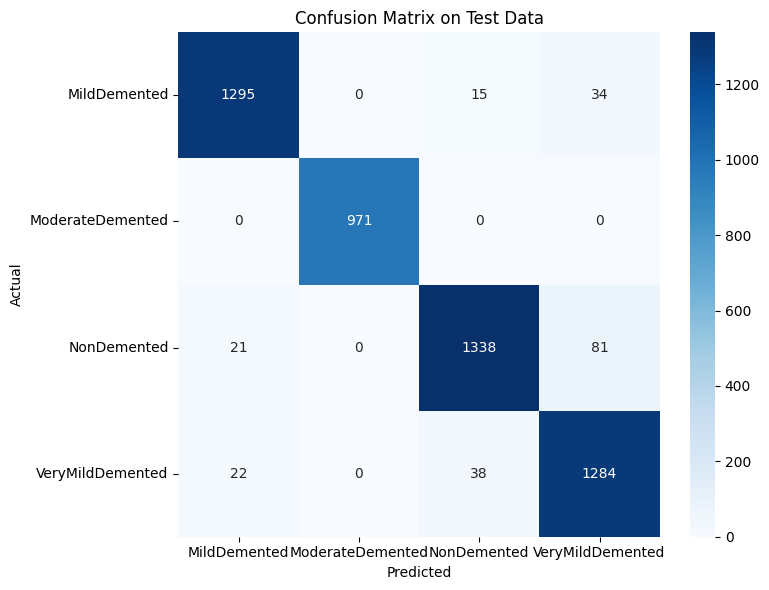

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Load saved model
model = load_model("resnet50.keras")

# Parameters (make sure these match your model)
img_size = (224, 224)  # or (300,300) if you used that
batch_size = 32

# Prepare test data generator with preprocessing (use same as training)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

test_data = test_datagen.flow_from_directory(
    '/content/Alzheimer_Dataset_V2/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict on test set
pred_probs = model.predict(test_data)
pred_classes = np.argmax(pred_probs, axis=1)

# True classes and class labels
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import classification_report
report_dict = classification_report(true_classes, pred_classes, target_names=class_labels, output_dict=True)

metrics_df = pd.DataFrame(report_dict).transpose()
metrics_df = metrics_df[['precision', 'recall', 'f1-score', 'support']]
metrics_df.style.background_gradient(cmap='YlGnBu').format(precision=2)


,precision,recall,f1-score,support
MildDemented,0.97,0.96,0.97,1344.00
ModerateDemented,1.00,1.00,1.00,971.00
NonDemented,0.96,0.93,0.95,1440.00
VeryMildDemented,0.92,0.96,0.94,1344.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,5099.00
weighted avg,0.96,0.96,0.96,5099.00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm
from tensorflow.keras.models import Model

# Pick one image batch from test_data
img_batch, label_batch = test_data[0]
img = img_batch[0:1]
true_label_idx = np.argmax(label_batch[0])

preds = model.predict(img)
pred_idx = np.argmax(preds[0])
class_labels = list(test_data.class_indices.keys())
pred_label = class_labels[pred_idx]

base_model = model.layers[0]
last_conv_layer_name = "conv5_block3_out"
last_conv_layer = base_model.get_layer(last_conv_layer_name)

grad_model = Model(
    inputs=base_model.input,
    outputs=[last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, pred_idx]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
conv_outputs = conv_outputs[0]

heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= (np.max(heatmap) + 1e-8)

heatmap_resized = cv2.resize(heatmap.numpy(), (img.shape[2], img.shape[1]))

# Undo preprocessing for visualization (assuming input preprocessed with resnet50 preprocess_input)
img_orig = img[0]
img_orig = (img_orig - img_orig.min()) / (img_orig.max() - img_orig.min())

heatmap_colored = cm.jet(heatmap_resized)[:, :, :3]

superimposed_img = heatmap_colored * 0.4 + img_orig
superimposed_img = np.clip(superimposed_img, 0, 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_orig)
plt.title(f"Original Image\nTrue: {class_labels[true_label_idx]}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap='jet')
plt.title("Grad-CAM Heatmap")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title(f"Overlay\nPred: {pred_label}")
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


AttributeError: The layer sequential has never been called and thus has no defined output.